/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

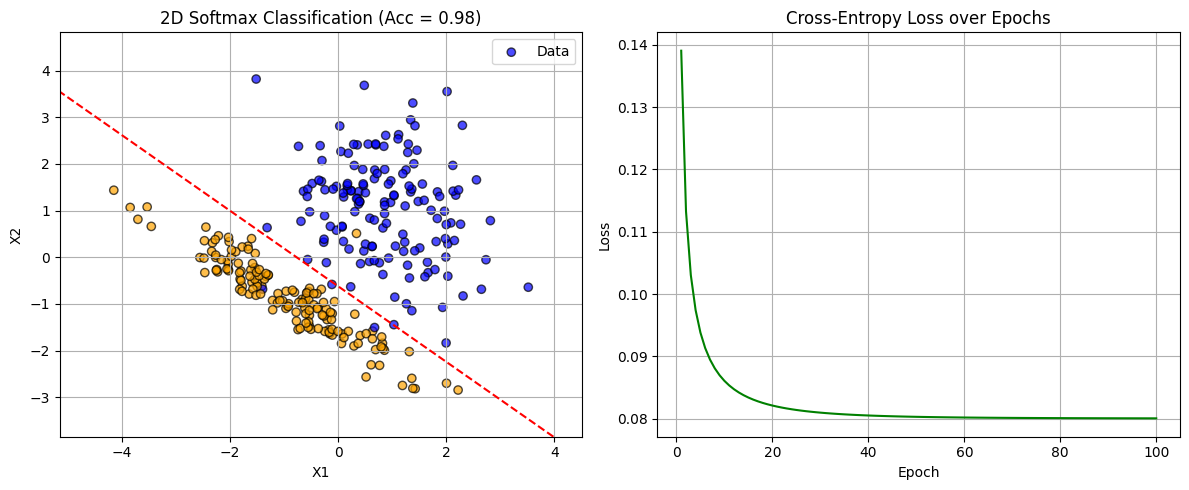

In [12]:
"""
Softmax (Logistic Regression) 2D Classification Demo
-----------------------------------------------------
Generate 2D points in two classes, train a softmax classifier,
visualize decision boundary and cross-entropy loss during training.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score

# Generate 2D data with two classes
# Generate 2D data with overlapping classes
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.9,   # <<< LOWERED for more overlap
    random_state=40
)

# Set up softmax classifier using SGD (so we can get loss per epoch)
clf = SGDClassifier(
    loss='log_loss',  # Softmax (Cross-Entropy)
    learning_rate='constant',
    eta0=0.05,
    max_iter=1,
    warm_start=True,
    random_state=42
)

loss_history = []
epochs = 100

for epoch in range(epochs):
    clf.fit(X, y)
    proba = clf.predict_proba(X)
    loss = log_loss(y, proba)
    loss_history.append(loss)

# Predict & Accuracy
y_pred = clf.predict(X)
acc = accuracy_score(y, y_pred)

# ---------------- Plot 1: Data + Decision Boundary ----------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['blue' if label == 0 else 'orange' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.7, edgecolor='k', label='Data')

# Decision boundary grid
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
proba_grid = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plt.contour(xx, yy, proba_grid, levels=[0.5], colors='red', linestyles='--')
plt.title(f"2D Softmax Classification (Acc = {acc:.2f})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()

# ---------------- Plot 2: Cross Entropy Loss ----------------
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), loss_history, color='green')
plt.title("Cross-Entropy Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()
